In [1]:
import cv2
# from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

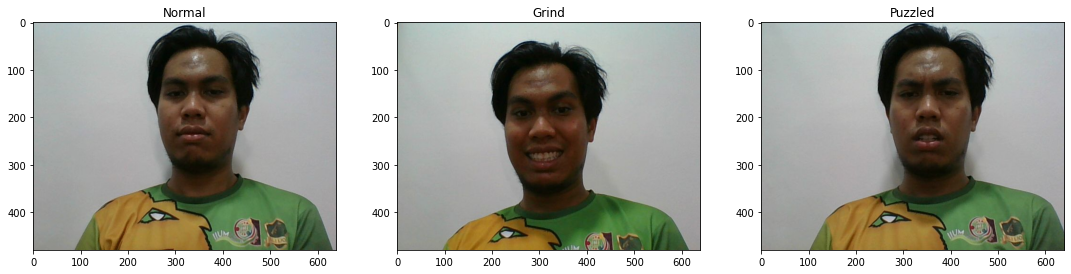

In [2]:
# Open image using openCV2
normal = cv2.imread("normal.jpg")
grind = cv2.imread("grind 2.jpg")
puzzled = cv2.imread("puzzled.jpg")

normal = cv2.cvtColor(normal, cv2.COLOR_BGR2RGB)
grind = cv2.cvtColor(grind, cv2.COLOR_BGR2RGB)
puzzled = cv2.cvtColor(puzzled, cv2.COLOR_BGR2RGB)

normalgray = cv2.cvtColor(normal,cv2.COLOR_RGB2GRAY)
grindgray = cv2.cvtColor(normal,cv2.COLOR_RGB2GRAY)
puzzledgray = cv2.cvtColor(normal,cv2.COLOR_RGB2GRAY)

normalcp = np.copy(normal)
grindcp = np.copy(grind)
puzzledcp = np.copy(puzzled)

plt.figure(figsize=[25,5])
plt.subplot(141);plt.imshow(normal,cmap = 'gray');plt.title("Normal");
plt.subplot(142);plt.imshow(grind,cmap = 'gray');plt.title("Grind");
plt.subplot(143);plt.imshow(puzzled,cmap = 'gray');plt.title("Puzzled");

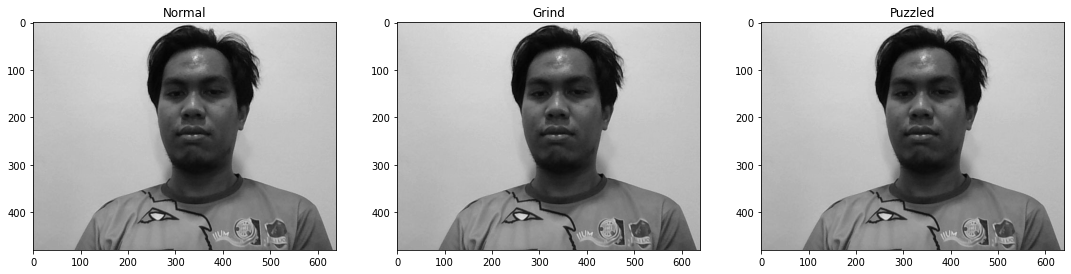

In [3]:

plt.figure(figsize=[25,5])
plt.subplot(141);plt.imshow(normalgray,cmap = 'gray');plt.title("Normal");
plt.subplot(142);plt.imshow(grindgray,cmap = 'gray');plt.title("Grind");
plt.subplot(143);plt.imshow(puzzledgray,cmap = 'gray');plt.title("Puzzled");

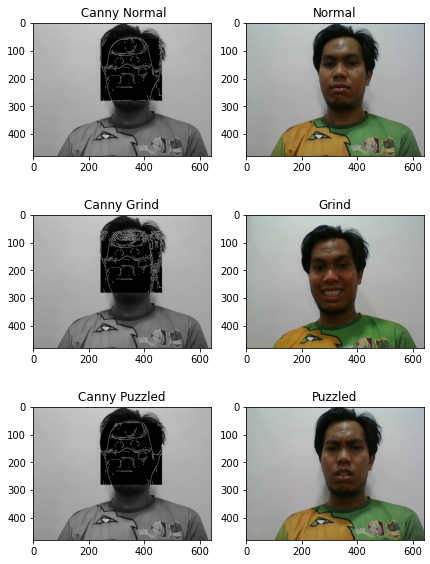

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

faces = face_cascade.detectMultiScale(normal)
faces2 = face_cascade.detectMultiScale(grind)
faces3 = face_cascade.detectMultiScale(puzzled)

#face = x,y,z
for (x,y,w,h) in faces:
  normalgray[y:y+h,x:x+w] = cv2.medianBlur(normalgray[y:y+h,x:x+w],35)
  
for (x,y,w,h) in faces2:
  grindgray[y:y+h,x:x+w] = cv2.medianBlur(grindgray[y:y+h,x:x+w],35)

for (x,y,w,h) in faces3:
  puzzledgray[y:y+h,x:x+w] = cv2.medianBlur(puzzledgray[y:y+h,x:x+w],35)
  
normalblur = np.copy(normalgray)
grindblur = np.copy(grindgray)
puzzledblur = np.copy(puzzledgray)

normalgray[y:y+h,x:x+w] = cv2.Canny(normalgray[y:y+h,x:x+w],15,15)
grindgray[y:y+h,x:x+w] = cv2.Canny(grindgray[y:y+h,x:x+w],15,15)
puzzledgray[y:y+h,x:x+w] = cv2.Canny(puzzledgray[y:y+h,x:x+w],15,15)


plt.figure(figsize=[7,10])
plt.subplot(321);plt.imshow(normalgray,cmap = 'gray');plt.title(" Canny Normal");
plt.subplot(322);plt.imshow(normal);plt.title("Normal");
plt.subplot(323);plt.imshow(grindgray,cmap = 'gray');plt.title("Canny Grind");
plt.subplot(324);plt.imshow(grind);plt.title("Grind");
plt.subplot(325);plt.imshow(puzzledgray,cmap = 'gray');plt.title("Canny Puzzled");
plt.subplot(326);plt.imshow(puzzled);plt.title("Puzzled");


In [5]:
#del normalgray, grindgray, puzzledgray

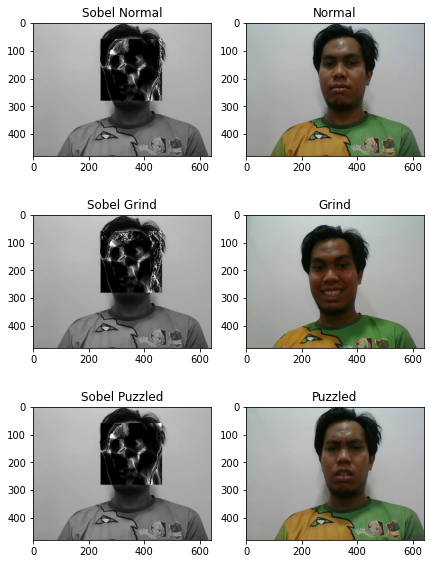

In [7]:
#sobel normal
normalsobelx = cv2.Sobel(normalblur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=5)
normalsobely = cv2.Sobel(normalblur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
normalblur[y:y+h,x:x+w] = normalsobelx + normalsobely

#sobel grind
grindsobelx = cv2.Sobel(grindblur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=5)
grindsobely = cv2.Sobel(grindblur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
grindblur[y:y+h,x:x+w] = grindsobelx + grindsobely

#sobel puzzled
puzzledsobelx = cv2.Sobel(puzzledblur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=5)
puzzledsobely = cv2.Sobel(puzzledblur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
puzzledblur[y:y+h,x:x+w] = puzzledsobelx + puzzledsobely


plt.figure(figsize=[7,10])
plt.subplot(321);plt.imshow(normalblur,cmap = 'gray');plt.title("Sobel Normal");
plt.subplot(322);plt.imshow(normal);plt.title("Normal");
plt.subplot(323);plt.imshow(grindblur,cmap = 'gray');plt.title("Sobel Grind");
plt.subplot(324);plt.imshow(grind);plt.title("Grind");
plt.subplot(325);plt.imshow(puzzledblur,cmap = 'gray');plt.title("Sobel Puzzled");
plt.subplot(326);plt.imshow(puzzled);plt.title("Puzzled");
